In [63]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/release/bin/'
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [64]:
from sklearn.model_selection import cross_val_score
from IPython.display import HTML
from graphviz import Source
from IPython.display import display
from IPython.display import SVG
style="<style>svg(width:70% !important;height:70% !important;)</style>"
HTML(style)

In [65]:
df_test_iris= pd.read_csv('test_iris.csv')
df_train_iris = pd.read_csv('train_iris.csv')
    

In [66]:
np.random.seed(0)

df_test_iris.shape

(50, 6)

In [67]:
df_train_iris.head()
X_train = df_train_iris.drop(['species', 'Unnamed: 0'], axis=1)
y_train = df_train_iris.species
y_train.head()

0    2
1    0
2    0
3    2
4    2
Name: species, dtype: int64

In [71]:
X_test = df_test_iris.drop(['species','Unnamed: 0'], axis=1)
y_test = df_test_iris.species
scores_iris = pd.DataFrame()
np.random.seed(0)

In [72]:

for max_depth in range(1,100):

    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_scores_iris= pd.DataFrame({'max_depth': [max_depth], 'train_score':[train_score],
                                    'test_score':[test_score]})
    scores_iris = scores_iris.append(temp_scores_iris)
    
scores_iris

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
...,...,...,...
0,95,1.00,0.92
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.94


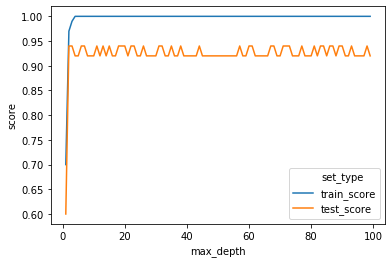

In [73]:
scores_iris_long = scores_iris.melt(id_vars='max_depth', value_vars=['train_score', 'test_score'],
                                    var_name='set_type', value_name='score')
scores_iris_long
sns.lineplot(x="max_depth",y="score", hue="set_type", data=scores_iris_long)
